### Preliminary Steps.

In [516]:
# Import important libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [517]:
# Supress Warnings.

import warnings
warnings.filterwarnings('ignore')

In [518]:
%config IPCompleter.greedy=True # Autocomplete feature.

In [519]:
# # Jupyter Notebook will display all rows and columns this way. Use ctrl+/ to comment/un-comment.

from IPython.display import display
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.precision = 2

In [520]:
# Read csv data.

df = pd.read_csv('df_cleaned.csv', encoding='utf-8')
df.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Lead Import,Direct Traffic,Olark Chat,Organic Search,Reference,Referral Sites,Search Engines,lead_source_SocialMedia,Welingak Website,CntryIsIndia,CntryIsntIndia,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Advertisements,Email,Multiple Sources,Online Search,hear_about_Other,SMS,Social Media,hear_about_stu_of_some_school,Word Of Mouth,Student,Unemployed,Working Professional,High in Relevance,Low in Relevance,Might be,Not Sure,Worst,Dual Specialization Student,Lateral Student,Other Leads,Potential Lead,Student of SomeSchool,Mumbai,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,AsymActScore>13,AsymProfScore>15,AsymActInd_High,AsymActInd_Medium,AsymActInd_Low,AsymActProf_High,AsymActProf_Medium,AsymActProf_Low,Approached upfront,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [521]:
len(df)

9097

### Train-Test split.

In [522]:
X = df.drop(['Prospect ID','Lead Number', 'Converted'], axis=1) # Putting feature variable to X.
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Lead Import,Direct Traffic,Olark Chat,Organic Search,Reference,Referral Sites,Search Engines,lead_source_SocialMedia,Welingak Website,CntryIsIndia,CntryIsntIndia,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Advertisements,Email,Multiple Sources,Online Search,hear_about_Other,SMS,Social Media,hear_about_stu_of_some_school,Word Of Mouth,Student,Unemployed,Working Professional,High in Relevance,Low in Relevance,Might be,Not Sure,Worst,Dual Specialization Student,Lateral Student,Other Leads,Potential Lead,Student of SomeSchool,Mumbai,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,AsymActScore>13,AsymProfScore>15,AsymActInd_High,AsymActInd_Medium,AsymActInd_Low,AsymActProf_High,AsymActProf_Medium,AsymActProf_Low,Approached upfront,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed
0,0,0.0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [523]:
y = df['Converted'] # Dependent variable to be predicted.

In [524]:
# Splitting the data into train and test.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=123, stratify=y)

### Scaling.

In [525]:
from sklearn.preprocessing import StandardScaler # import.
scaler = StandardScaler() # instantiate.
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[[
   'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]) # fit and transform.
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[[
   'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]) # fit and transform.

### Correlation Heatmap.

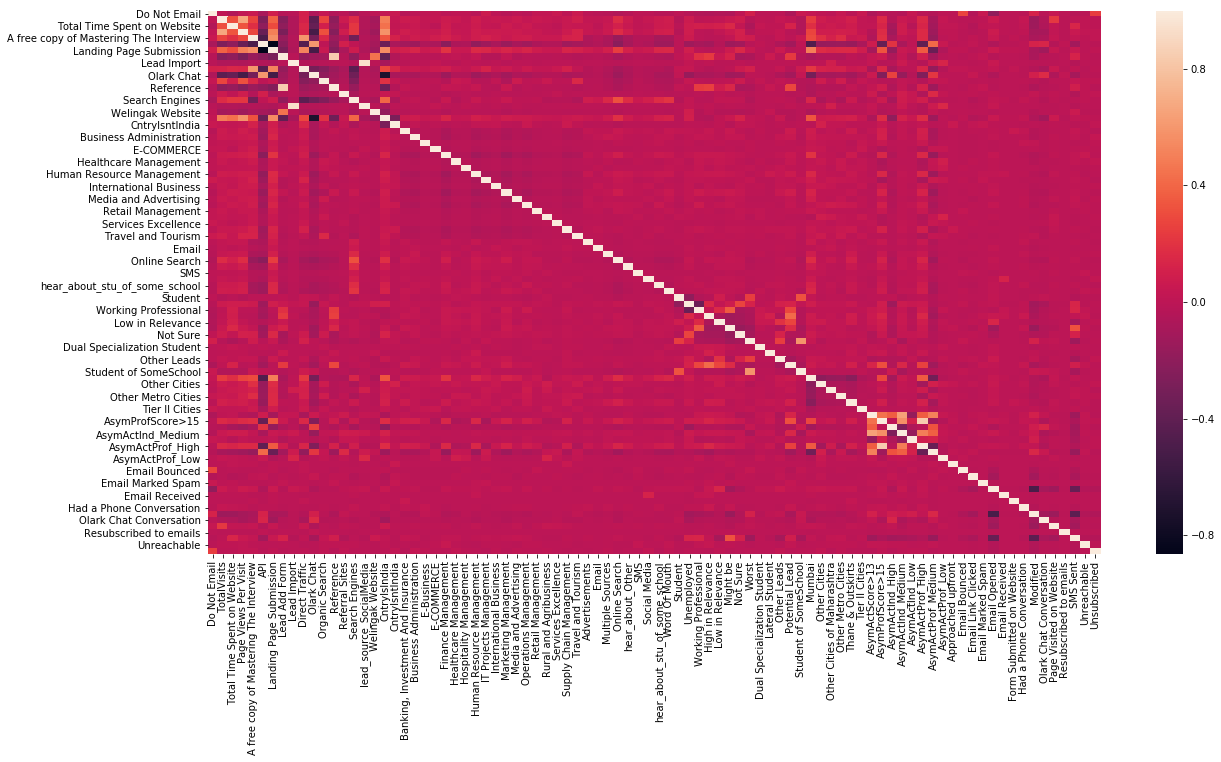

In [526]:
# Let's see the correlation matrix.

plt.figure(figsize = (20,10))
corr_df = X.corr()
sns.heatmap(corr_df,annot = False)
plt.show()

There is indeed some correlation between a few variables. We should remove such features before RFE. https://datascience.stackexchange.com/questions/24975/correlation-and-feature-selection

### Drop correlated features.

In [527]:
corr_mat = np.array(corr_df)
tri_upper_no_diag = np.triu(corr_mat, k=1) # Considering only the upper triangular matrix, as is a symmetric matrix.
                                           # k=1 means diagonal will not be selected.
# tri_upper_no_diag

In [528]:
x, y = np.nonzero((tri_upper_no_diag >= 0.60) | (tri_upper_no_diag <= -0.60)) # x and y indices of elements where
                                                                              # correlation is more than 60%.

In [529]:
for i, j in zip(x, y):
    print(list(corr_df.iloc[[i, j]].index), corr_mat[i,j].round(2)) # correlated columns and their correlation.

['TotalVisits', 'Page Views Per Visit'] 0.67
['API', 'Landing Page Submission'] -0.87
['API', 'Olark Chat'] 0.6
['Lead Add Form', 'Reference'] 0.85
['Lead Import', 'lead_source_SocialMedia'] 0.94
['Olark Chat', 'CntryIsIndia'] -0.71
['AsymActScore>13', 'AsymActInd_Medium'] 0.64
['AsymProfScore>15', 'AsymActProf_High'] 0.85


In [530]:
# Dropping one variable each from the correlated pairs shown above.

X_train.drop('Page Views Per Visit', axis=1, inplace=True)
X_test.drop('Page Views Per Visit', axis=1, inplace=True)

X_train.drop('API', axis=1, inplace=True)
X_test.drop('API', axis=1, inplace=True)

X_train.drop('Lead Add Form', axis=1, inplace=True)
X_test.drop('Lead Add Form', axis=1, inplace=True)

X_train.drop('Lead Import', axis=1, inplace=True)
X_test.drop('Lead Import', axis=1, inplace=True)

X_train.drop('Olark Chat', axis=1, inplace=True)
X_test.drop('Olark Chat', axis=1, inplace=True)

X_train.drop('AsymActInd_Medium', axis=1, inplace=True)
X_test.drop('AsymActInd_Medium', axis=1, inplace=True)

X_train.drop('AsymActProf_High', axis=1, inplace=True)
X_test.drop('AsymActProf_High', axis=1, inplace=True)

In [531]:
X_train.shape # We have 81 independent variables remaining now.

(6367, 81)

### Select features using RFE.

In [532]:
from sklearn.linear_model import LogisticRegression # import.
logreg = LogisticRegression() # instantiate.

In [533]:
from sklearn.feature_selection import RFE # import.
rfe30 = RFE(logreg, 30) # instantiate. Select 30 features.
rfe30 = rfe30.fit(X_train, y_train) # fit.

In [534]:
# pd.DataFrame([X_train.columns, rfe30.ranking_]).transpose().sort_values(by=1) # features and their rank.

In [535]:
col30 = X_train.columns[rfe30.support_] # 30 selected features.

In [536]:
col30

Index(['Do Not Email', 'Total Time Spent on Website', 'Reference',
       'lead_source_SocialMedia', 'Welingak Website', 'CntryIsIndia',
       'CntryIsntIndia', 'E-Business', 'Multiple Sources', 'SMS', 'Student',
       'Working Professional', 'High in Relevance', 'Low in Relevance',
       'Might be', 'Not Sure', 'Worst', 'Dual Specialization Student',
       'Lateral Student', 'Other Leads', 'Potential Lead', 'AsymActScore>13',
       'AsymProfScore>15', 'AsymActInd_Low', 'AsymActProf_Medium',
       'Had a Phone Conversation', 'Modified', 'Olark Chat Conversation',
       'SMS Sent', 'Unsubscribed'],
      dtype='object')

In [537]:
rfe15 = RFE(logreg, 15) # instantiate. Select 15 features.
rfe15 = rfe15.fit(X_train, y_train) # fit.

In [538]:
# pd.DataFrame([X_train.columns, rfe15.ranking_]).transpose().sort_values(by=1) # features and their rank.

In [539]:
col15 = X_train.columns[rfe15.support_] # 15 selected features.

In [540]:
col15

Index(['Do Not Email', 'Total Time Spent on Website', 'Reference',
       'Welingak Website', 'CntryIsIndia', 'CntryIsntIndia',
       'Working Professional', 'High in Relevance', 'Low in Relevance',
       'Might be', 'Worst', 'Lateral Student', 'AsymActInd_Low', 'SMS Sent',
       'Unsubscribed'],
      dtype='object')

### Building first model. Using all the features.

In [541]:
(1 - df['Converted'].mean())*100

61.96548312630538

Therefore, 62% is the baseline that we should definitely beat.

In [542]:
import statsmodels.api as sm # import.
X_train_sm = sm.add_constant(X_train) # add constant.
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()) # instantiate. Logistic regression.
res = logm1.fit() # fit.
res.summary() # results.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6367
Model:                            GLM   Df Residuals:                     6287
Model Family:                Binomial   Df Model:                           79
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        02:38:16   Pearson chi2:                 6.42e+18
No. Iterations:                   100   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -3.308e+15   6.75e+07   -4.9e+07      0.000   -3.31e+15   -3.31e+15
Do Not Email                            -7.45e+14   3.62e+06  -2.06e+08      0.000   -7.45e+14   -7.45e+14
TotalVisits                             5.448e+13   1.09e+06   4.98e+07      0.000    5.45e+13    5.45e+13
Total Time Spent on Website             6.892e+14   1.02e+06   6.78e+08      0.000    6.89e+14    6.89e+14
A free copy of Mastering The Interview  6.168e+13   3.47e+06   1.78e+07      0.000    6.17e+13    6.17e+13
Landing Page Submission                 -4.63e+14   4.31e+06  -1.08e+08      0.000   -4.63e+14   -4.63e+14
Direct Traffic                         -2.256e+14   6.85e+06  -3.29e+07      0.000   -2.26e+14   -2.26e+14
Organic Search                         -1.448e+14   6.88e+06   -2.1e+07      0.000   -1.45e+14   -1.45e+14
Reference                               1.593e+14   5.08e+06   3.14e+07      0.000    1.59e+14    1.59e+14
Referral Sites                         -5.019e+14   9.54e+06  -5.26e+07      0.000   -5.02e+14   -5.02e+14
Search Engines                         -7.028e+13   6.42e+06  -1.09e+07      0.000   -7.03e+13   -7.03e+13
lead_source_SocialMedia                -2.526e+14    1.5e+07  -1.68e+07      0.000   -2.53e+14   -2.53e+14
Welingak Website                        8.388e+14   7.16e+06   1.17e+08      0.000    8.39e+14    8.39e+14
CntryIsIndia                           -6.099e+14   6.38e+06  -9.56e+07      0.000    -6.1e+14    -6.1e+14
CntryIsntIndia                         -5.977e+14   7.87e+06  -7.59e+07      0.000   -5.98e+14   -5.98e+14
Banking, Investment And Insurance       3.396e+14   5.88e+06   5.78e+07      0.000     3.4e+14     3.4e+14
Business Administration                 2.404e+14   5.66e+06   4.24e+07      0.000     2.4e+14     2.4e+14
E-Business                             -1.607e+14    1.2e+07  -1.34e+07      0.000   -1.61e+14   -1.61e+14
E-COMMERCE                               4.23e+14   8.73e+06   4.85e+07      0.000    4.23e+14    4.23e+14
Finance Management                      2.176e+14   4.77e+06   4.56e+07      0.000    2.18e+14    2.18e+14
Healthcare Management                   8.134e+13   7.89e+06   1.03e+07      0.000    8.13e+13    8.13e+13
Hospitality Management                  2.523e+14   9.18e+06   2.75e+07      0.000    2.52e+14    2.52e+14
Human Resource Management               1.902e+14   4.73e+06   4.02e+07      0.000     1.9e+14     1.9e+14
IT Projects Management                  5.115e+14   6.02e+06    8.5e+07      0.000    5.11e+14    5.11e+14
International Business                  4.195e+14   7.46e+06   5.62e+07      0.000     4.2e+14     4.2e+14
Marketing Management                    3.513e+14   4.69e+06   7.49e+07      0.000    3.51e+14    3.51e+14
Media and Advertising                   2.918e+14   6.87e+0

In [543]:
# Getting the predicted values on the train set.
y_train_pred = res.predict(X_train_sm) # predict.

In [544]:
(y_train_pred == y_train).mean()

0.7760326684466782

We are getting 77.6% accuracy. Now let's check precision, recall and F1 Score.

In [545]:
from sklearn import metrics # import.
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[2946  999]
 [ 427 1995]]


In [546]:
print(metrics.precision_score(y_train, y_train_pred))
print(metrics.recall_score(y_train, y_train_pred)) 
print(metrics.f1_score(y_train, y_train_pred))

0.6663326653306614
0.8236994219653179
0.7367060561299853


Do we get similar results in test set?

In [547]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [548]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.precision_score(y_test, y_test_pred))
print(metrics.recall_score(y_test, y_test_pred)) 
print(metrics.f1_score(y_test, y_test_pred))

0.7384615384615385
0.6201780415430267
0.8053949903660886
0.7007544006705784


Here we can see that our precision, recall, and F1-score fall behind, but not much.

### Building 2nd model. With 30 features selected using RFE.

In [549]:
X_train_sm2 = sm.add_constant(X_train[col30])
logm2 = sm.GLM(y_train, X_train_sm2, family = sm.families.Binomial()) # instantiate. Logistic regression.
res2 = logm2.fit() # fit.
res2.summary() # results.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6367
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2050.5
Date:                Sun, 03 Mar 2019   Deviance:                       4100.9
Time:                        02:38:18   Pearson chi2:                 7.16e+03
No. Iterations:                    22   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.8279      0.120     -6.871      0.000      -1.064      -0.592
Do Not Email                   -1.5474      0.230     -6.726      0.000      -1.998      -1.097
Total Time Spent on Website     1.1349      0.047     23.919      0.000       1.042       1.228
Reference                       0.9647      0.274      3.518      0.000       0.427       1.502
lead_source_SocialMedia        -0.9500      0.664     -1.431      0.153      -2.252       0.352
Welingak Website                5.3071      0.741      7.158      0.000       3.854       6.760
CntryIsIndia                   -1.1855      0.120     -9.855      0.000      -1.421      -0.950
CntryIsntIndia                 -1.3562      0.262     -5.181      0.000      -1.869      -0.843
E-Business                     -0.9221      0.615     -1.500      0.134      -2.127       0.282
Multiple Sources               -0.7009      0.328     -2.140      0.032      -1.343      -0.059
SMS                            -1.3842      1.061     -1.305      0.192      -3.463       0.695
Student                         0.2237      0.340      0.657      0.511      -0.443       0.891
Working Professional            1.4926      0.224      6.665      0.000       1.054       1.932
High in Relevance               3.3806      0.269     12.550      0.000       2.853       3.909
Low in Relevance                1.8564      0.189      9.803      0.000       1.485       2.228
Might be                        1.6014      0.117     13.716      0.000       1.373       1.830
Not Sure                       -0.3619      0.130     -2.789      0.005      -0.616      -0.108
Worst                          -2.6214      0.389     -6.741      0.000      -3.384      -1.859
Dual Specialization Student    21.3175   2.01e+04      0.001      0.999   -3.95e+04    3.95e+04
Lateral Student                21.8296   1.69e+04      0.001      0.999    -3.3e+04    3.31e+04
Other Leads                     0.9029      0.202      4.476      0.000       0.508       1.298
Potential Lead                  0.9904      0.143      6.930      0.000       0.710       1.270
AsymActScore>13                 1.3067      0.136      9.636      0.000       1.041       1.572
AsymProfScore>15               -0.6629      0.127     -5.211      0.000      -0.912      -0.414
AsymActInd_Low                 -1.2695      0.339     -3.747      0.000      -1.934      -0.605
AsymActProf_Medium             -0.6687      0.130     -5.144      0.000      -0.923      -0.414
Had a Phone Conversation        1.6832      1.737      0.969      0.332      -1.721       5.087
Modified                       -0.5550      0.098     -5.687      0.000      -0.746      -0.364
Olark Chat Conversation        -0.9750      0.311     -3.135      0.002      -1.585      -0.365
SMS Sent                        1.5538      0.106     14.645      0.000       1.346       

Around 7 or 8 columns are shown as insignificant here. This is indicated by a p-value more than 0.05.

In [550]:
# Getting the predicted values on the train set.
y_train_pred = res2.predict(X_train_sm2) # predict.

In [551]:
y_train_pred = pd.DataFrame({'Converted':y_train, 'Converted_Prob':y_train_pred})
y_train_pred['predicted'] = y_train_pred.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [552]:
confusion = metrics.confusion_matrix(y_train_pred['Converted'], y_train_pred['predicted'])
print(confusion)

[[3618  327]
 [ 541 1881]]


In [553]:
print(metrics.accuracy_score(y_train_pred['Converted'], y_train_pred['predicted']))
print(metrics.precision_score(y_train_pred['Converted'], y_train_pred['predicted']))
print(metrics.recall_score(y_train_pred['Converted'], y_train_pred['predicted'])) 
print(metrics.f1_score(y_train_pred['Converted'], y_train_pred['predicted']))

0.8636720590544997
0.8519021739130435
0.7766308835672997
0.8125269978401728


We are getting 85% accuracy. Also, good precision, recall and F1 Score.

Do we get similar results in test set?

In [554]:
X_test_sm2 = sm.add_constant(X_test[col30])
y_test_pred = res2.predict(X_test_sm2)

In [555]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred['predicted'] = y_test_pred.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [556]:
print(metrics.accuracy_score(y_test_pred['Converted'], y_test_pred['predicted']))
print(metrics.precision_score(y_test_pred['Converted'], y_test_pred['predicted']))
print(metrics.recall_score(y_test_pred['Converted'], y_test_pred['predicted'])) 
print(metrics.f1_score(y_test_pred['Converted'], y_test_pred['predicted']))

0.8457875457875458
0.8183694530443757
0.7639691714836223
0.7902341803687096


Here we can see that our precision, recall, and F1-score are good as well.

### Building 3rd model. With 15 features selected using RFE.

In [557]:
X_train_sm3 = sm.add_constant(X_train[col15])
logm3 = sm.GLM(y_train, X_train_sm3, family = sm.families.Binomial()) # instantiate. Logistic regression.
res3 = logm3.fit() # fit.
res3.summary() # results.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6367
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2153.3
Date:                Sun, 03 Mar 2019   Deviance:                       4306.6
Time:                        02:38:19   Pearson chi2:                 6.97e+03
No. Iterations:                    22   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.8487      0.092     -9.239      0.000      -1.029      -0.669
Do Not Email                   -1.7160      0.221     -7.752      0.000      -2.150      -1.282
Total Time Spent on Website     1.1068      0.046     24.183      0.000       1.017       1.196
Reference                       1.2196      0.262      4.650      0.000       0.706       1.734
Welingak Website                5.4107      0.739      7.326      0.000       3.963       6.858
CntryIsIndia                   -1.1936      0.112    -10.687      0.000      -1.413      -0.975
CntryIsntIndia                 -1.3982      0.254     -5.515      0.000      -1.895      -0.901
Working Professional            1.6641      0.215      7.756      0.000       1.244       2.085
High in Relevance               4.0736      0.248     16.443      0.000       3.588       4.559
Low in Relevance                2.6332      0.158     16.681      0.000       2.324       2.943
Might be                        1.8403      0.105     17.480      0.000       1.634       2.047
Worst                          -2.3272      0.380     -6.117      0.000      -3.073      -1.582
Lateral Student                21.0975   1.68e+04      0.001      0.999   -3.29e+04     3.3e+04
AsymActInd_Low                 -2.2812      0.319     -7.149      0.000      -2.907      -1.656
SMS Sent                        1.6391      0.090     18.180      0.000       1.462       1.816
Unsubscribed                    1.8586      0.590      3.149      0.002       0.702       3.015
===============================================================================================
"""

1 feature is shown as insignificant here. This is indicated by a p-value more than 0.05.

In [558]:
# Getting the predicted values on the train set.
y_train_pred = res3.predict(X_train_sm3) # predict.

In [559]:
y_train_pred = pd.DataFrame({'Converted':y_train, 'Converted_Prob':y_train_pred})
y_train_pred['predicted'] = y_train_pred.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [560]:
confusion = metrics.confusion_matrix(y_train_pred['Converted'], y_train_pred['predicted'])
print(confusion)

[[3613  332]
 [ 601 1821]]


In [561]:
print(metrics.accuracy_score(y_train_pred['Converted'], y_train_pred['predicted']))
print(metrics.precision_score(y_train_pred['Converted'], y_train_pred['predicted']))
print(metrics.recall_score(y_train_pred['Converted'], y_train_pred['predicted'])) 
print(metrics.f1_score(y_train_pred['Converted'], y_train_pred['predicted']))

0.8534631694675672
0.8457965629354389
0.7518579686209744
0.7960655737704917


We are getting 85% accuracy. Also, good precision, recall and F1 Score.

Do we get similar results in test set?

In [562]:
X_test_sm3 = sm.add_constant(X_test[col15])
y_test_pred = res3.predict(X_test_sm3)

In [563]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred['predicted'] = y_test_pred.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [564]:
print(metrics.accuracy_score(y_test_pred['Converted'], y_test_pred['predicted']))
print(metrics.precision_score(y_test_pred['Converted'], y_test_pred['predicted']))
print(metrics.recall_score(y_test_pred['Converted'], y_test_pred['predicted'])) 
print(metrics.f1_score(y_test_pred['Converted'], y_test_pred['predicted']))

0.8388278388278388
0.821505376344086
0.7360308285163777
0.7764227642276423


Here we can see that our precision, recall, and F1-score are good as well.

Although results have dropped by 1 or 2% when comparing with previous model with 30 features considered.

### Let's drop variables from the 3rd Model with 15 features.

## Model 4. With 14 Features.
Let's create a new model with 14 features thus selected.

`Lateral Student` is insignificant here so we can drop it.

In [565]:
X_train_sm4 = X_train[col15]
X_train_sm4.drop('Lateral Student', axis=1, inplace=True)
X_train_sm4 = sm.add_constant(X_train_sm4)

In [566]:
logm4 = sm.GLM(y_train, X_train_sm4, family = sm.families.Binomial()) # instantiate. Logistic regression.
res4 = logm4.fit() # fit.
res4.summary() # results.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6367
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2154.9
Date:                Sun, 03 Mar 2019   Deviance:                       4309.7
Time:                        02:38:21   Pearson chi2:                 7.00e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.8490      0.092     -9.242      0.000      -1.029      -0.669
Do Not Email                   -1.7182      0.221     -7.758      0.000      -2.152      -1.284
Total Time Spent on Website     1.1068      0.046     24.180      0.000       1.017       1.196
Reference                       1.2237      0.262      4.669      0.000       0.710       1.737
Welingak Website                5.4127      0.739      7.328      0.000       3.965       6.860
CntryIsIndia                   -1.1926      0.112    -10.679      0.000      -1.412      -0.974
CntryIsntIndia                 -1.4007      0.254     -5.520      0.000      -1.898      -0.903
Working Professional            1.6640      0.214      7.758      0.000       1.244       2.084
High in Relevance               4.0902      0.247     16.532      0.000       3.605       4.575
Low in Relevance                2.6547      0.157     16.863      0.000       2.346       2.963
Might be                        1.8405      0.105     17.482      0.000       1.634       2.047
Worst                          -2.3272      0.380     -6.117      0.000      -3.073      -1.582
AsymActInd_Low                 -2.2865      0.319     -7.160      0.000      -2.912      -1.661
SMS Sent                        1.6385      0.090     18.170      0.000       1.462       1.815
Unsubscribed                    1.8576      0.591      3.144      0.002       0.700       3.015
===============================================================================================
"""

Let's plot VIFs now.

In [567]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
dummy = X_train_sm4.copy().drop('const', axis=1)
vif['Features'] = dummy.columns
vif['VIF'] = [variance_inflation_factor(dummy.values, i) for i in range(dummy.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,CntryIsIndia,1.75
9,Might be,1.70
12,SMS Sent,1.48
6,Working Professional,1.38
2,Reference,1.36
7,High in Relevance,1.23
0,Do Not Email,1.18
1,Total Time Spent on Website,1.18
8,Low in Relevance,1.17
10,Worst,1.11


All the VIFs are below 2, which is good, because VIF above 5 is questionable.

In [568]:
# Getting the predicted values on the train set.
y_train_pred = res4.predict(X_train_sm4) # predict.

In [569]:
y_train_pred = pd.DataFrame({'Converted':y_train, 'Converted_Prob':y_train_pred})
y_train_pred['predicted'] = y_train_pred.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

## ROC Curve.
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [570]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [571]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred.Converted, 
                                         y_train_pred.Converted_Prob, 
                                         drop_intermediate = False)

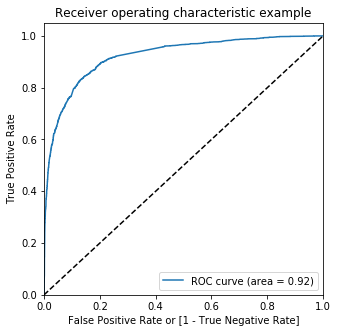

In [572]:
draw_roc(y_train_pred.Converted, y_train_pred.Converted_Prob)

## Finding Optimal Cutoff Point.

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity.

In [573]:
# Let's create columns with different probability cutoffs.

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred[i]= y_train_pred.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5976,0,0.94,1,1,1,1,1,1,1,1,1,1,1
131,0,0.24,0,1,1,1,0,0,0,0,0,0,0
8477,0,0.05,0,1,0,0,0,0,0,0,0,0,0
6427,0,0.35,0,1,1,1,1,0,0,0,0,0,0
1905,0,0.08,0,1,0,0,0,0,0,0,0,0,0


In [574]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred.Converted, y_train_pred[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i,accuracy,sensivity,specificity]
print(cutoff_df)

     prob  accuracy  sensivity  specificity
0.0   0.0      0.38       1.00         0.00
0.1   0.1      0.69       0.96         0.52
0.2   0.2      0.82       0.91         0.77
0.3   0.3      0.84       0.86         0.83
0.4   0.4      0.86       0.82         0.88
0.5   0.5      0.85       0.75         0.92
0.6   0.6      0.85       0.71         0.94
0.7   0.7      0.84       0.65         0.96
0.8   0.8      0.82       0.57         0.97
0.9   0.9      0.78       0.44         0.99


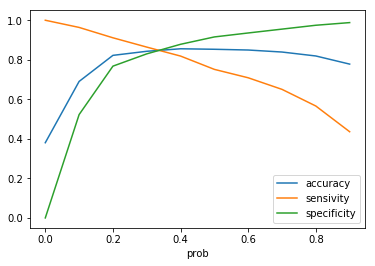

In [575]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensivity','specificity'])
plt.show()

Somewhere around 0.3 comes as the optimal cutoff point.

In [576]:
y_train_pred['final_predicted'] = y_train_pred.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
5976,0,0.94,1,1,1,1,1,1,1,1,1,1,1,1
131,0,0.24,0,1,1,1,0,0,0,0,0,0,0,0
8477,0,0.05,0,1,0,0,0,0,0,0,0,0,0,0
6427,0,0.35,0,1,1,1,1,0,0,0,0,0,0,1
1905,0,0.08,0,1,0,0,0,0,0,0,0,0,0,0


In [577]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred.Converted, y_train_pred.final_predicted)

0.8429401602010366

In [578]:
confusion = metrics.confusion_matrix(y_train_pred.Converted, y_train_pred.final_predicted )
confusion

array([[3274,  671],
       [ 329, 2093]], dtype=int64)

In [579]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [580]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8641618497109826

In [581]:
# Let us calculate specificity
TN / float(TN+FP)

0.8299112801013941

In [582]:
# Calculate false postive rate - predicting converted when customer hasn't converted
print(FP/ float(TN+FP))

0.17008871989860583


In [583]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7572358900144718


In [584]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9086872051068554


## Precision and Recall.

In [585]:
confusion = metrics.confusion_matrix(y_train_pred['Converted'], y_train_pred['predicted'])
print(confusion)

[[3612  333]
 [ 602 1820]]


In [586]:
# on train set.
print(metrics.accuracy_score(y_train_pred['Converted'], y_train_pred['predicted']))
print(metrics.precision_score(y_train_pred['Converted'], y_train_pred['predicted']))
print(metrics.recall_score(y_train_pred['Converted'], y_train_pred['predicted'])) 
print(metrics.f1_score(y_train_pred['Converted'], y_train_pred['predicted']))

0.8531490497879692
0.8453320947515095
0.7514450867052023
0.7956284153005465


We are getting 85% accuracy. Also, good precision, recall and F1 Score.

## Precision and Recall Trade-off.

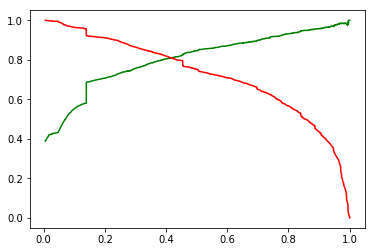

In [587]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred.Converted, y_train_pred.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Somewhere arount 0.4 is the optimal probability.

## Making predictions on test set.

In [588]:
X_test_sm4 = sm.add_constant(X_test[col15])
X_test_sm4.drop('Lateral Student', axis=1, inplace=True)
y_test_pred = res4.predict(X_test_sm4)

In [589]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred['predicted'] = y_test_pred.Converted_Prob.map(lambda x: 1 if x > 0.40 else 0)

In [590]:
# on test set.
print(metrics.accuracy_score(y_test_pred['Converted'], y_test_pred['predicted']))
print(metrics.precision_score(y_test_pred['Converted'], y_test_pred['predicted']))
print(metrics.recall_score(y_test_pred['Converted'], y_test_pred['predicted'])) 
print(metrics.f1_score(y_test_pred['Converted'], y_test_pred['predicted']))

0.8421245421245421
0.7807585568917669
0.8131021194605009
0.7966021708352997


Here we can see that our precision, recall, and F1-score are good as well.

## Additional.

# L1 penalty Logistic Regression

In [591]:
from sklearn.linear_model import LogisticRegression # import.
log = LogisticRegression(penalty='l1', solver='liblinear', random_state=111, n_jobs=-1) # instantiate.

In [592]:
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import mean_squared_error, r2_score

In [593]:
from sklearn.pipeline import make_pipeline
hyperparameters = { 'class_weight' : [None, 'balanced'], 
                    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf = GridSearchCV(estimator = log, param_grid = hyperparameters, cv=5, scoring = '%s_macro' % 'precision')
#log.get_params().keys() # hyperparameters that we can set.

In [594]:
best_model = clf.fit(X_train, y_train)

In [595]:
# View best hyperparameters
print('Best Weight:', best_model.best_estimator_.get_params()['class_weight'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Weight: None
Best C: 10


In [596]:
# Predict target vector
y_test_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

In [597]:
print(metrics.precision_score(y_train, y_train_pred))
print(metrics.precision_score(y_train, y_train_pred, average="macro"))
print(metrics.recall_score(y_train, y_train_pred, average="macro")) 
print(metrics.f1_score(y_train, y_train_pred, average="macro"))

0.848050201703272
0.8599535341204949
0.8476205128527158
0.8528512873351173


In [598]:
print(metrics.precision_score(y_test, y_test_pred))
print(metrics.precision_score(y_test, y_test_pred, average="macro"))
print(metrics.recall_score(y_test, y_test_pred, average="macro")) 
print(metrics.f1_score(y_test, y_test_pred, average="macro"))

0.8253319713993871
0.8469892295603446
0.8386781043742058
0.8423608448144302


We get similar results using gridsearch and L1 logistic regression, without doing all the hard work.

Coefficients and Intercept chosen by best model.

In [599]:
coefficients = best_model.best_estimator_.coef_

In [600]:
best_model.best_estimator_.intercept_ 

array([-0.67413375])

In [601]:
coef_df = pd.DataFrame(list(X_test.columns), list(coefficients))
coef_df.reset_index(inplace=True)
coef_df.rename(columns={'level_0': 'coefficient', 0:'Feature'}, inplace=True)
coef_df.sort_values(by='coefficient', ascending=False, inplace=True)

30 most important features.

In [602]:
coef_df.head(15)

,coefficient,Feature
11,4.95,Welingak Website
50,3.76,Lateral Student
44,3.18,High in Relevance
49,2.70,Dual Specialization Student
43,1.94,Working Professional
45,1.70,Low in Relevance
60,1.38,AsymActScore>13
46,1.37,Might be
73,1.35,Had a Phone Conversation
78,1.33,SMS Sent


In [603]:
coef_df.tail(15)

,coefficient,Feature
61,-0.60,AsymProfScore>15
4,-0.63,Landing Page Submission
74,-0.72,Modified
10,-0.73,lead_source_SocialMedia
67,-0.74,Email Bounced
65,-0.75,AsymActProf_Low
8,-0.80,Referral Sites
64,-0.89,AsymActProf_Medium
12,-1.06,CntryIsIndia
37,-1.11,SMS
